<center>
    
    Classification
    
    Author: Daniel Coble
</center>

So far, we have focused on problems in regression. A regression problem has its output in the space $\mathbb{R}^N$. In other words, it's a continuous value. Another very common problem in machine learning in classification. In this scheme, we want to identify which class some sample belongs to. The dataset may look like $\{x_i, l_i\}_{i=1}^N$, where $l_i$ is a class label and is one of a finite set. So for classification of fruits, $l_i$ might be "apple", "orange", or "pear".

The key to classification is to turn it into a regression problem. For each class label, we associate one of the standard basis elements (vector with one 1 and all other elements zero). So we could associate $\left(1, 0, 0\right)$ with "apple", $\left(0, 1, 0\right)$ with "orange", and $\left(0, 0, 1\right)$. Then we train like a regression problem. After training, the model prediction won't neatly have one 1 and the rest 0's, but we can take the largest element as the classification prediction.

For regression problems, we saw that we typically use no activation function on the final layer. For regression problems, it's standard to use the softmax activation function.

$$ \sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^k{e^{z_j}}} $$

The softmax activation function makes all elements positive and the elements of the vector sum to 1. This gives us a nice interpretation of the output as the model's confidence in its classification. Continuing the fruit example, if the model returns $\left(.81, .09, .1\right)$, then the model is 81% sure that the sample is an apple, 9% sure that the sample is an orange, and 10% sure that the sample is a pear.

For this notebook, we'll do a simple 2D problem of with three classes that are spread over the plane. This will help you visualize how different classes can lie an different places in the sample space. Let's load and plot the dataset.

<IPython.core.display.Javascript object>


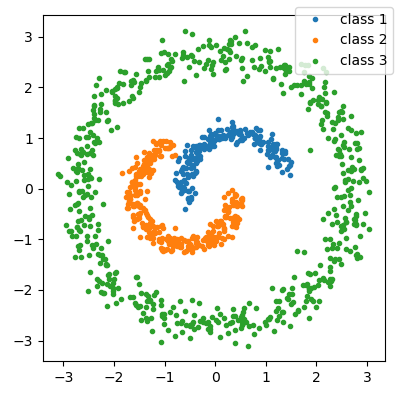

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

x_class1 = np.load('./data/x_class1.npy')
x_class2 = np.load('./data/x_class2.npy')
x_class3 = np.load('./data/x_class3.npy')

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.set_aspect('equal')
ax.plot(x_class1[:,0], x_class1[:,1], marker='.', linewidth=0, label='class 1')
ax.plot(x_class2[:,0], x_class2[:,1], marker='.', linewidth=0, label='class 2')
ax.plot(x_class3[:,0], x_class3[:,1], marker='.', linewidth=0, label='class 3')
fig.legend()
fig.tight_layout()

In [2]:
# now let's assemble the dataset for training

y_class1 = np.repeat([[1,0,0]], x_class1.shape[0], axis=0)
y_class2 = np.repeat([[0,1,0]], x_class2.shape[0], axis=0)
y_class3 = np.repeat([[0,0,1]], x_class3.shape[0], axis=0)

X = np.append(x_class1, x_class2, axis=0)
X = np.append(X, x_class3, axis=0)
y = np.append(y_class1, y_class2, axis=0)
y = np.append(y, y_class3, axis=0)

Now that we have the dataset prepared, we can train a NN basically the same way as in the last notebook.

In [3]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(2,), activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(3, activation='softmax') # output dimension matches number of classes, softmax activation
])

adam = keras.optimizers.Adam(learning_rate=.01)

model.compile(optimizer=adam, loss=keras.losses.MeanSquaredError())

n_epochs = 30
history = model.fit(X, y,
                    epochs=n_epochs,
                    batch_size=64,
)
y_pred = model.predict(X)

Epoch 1/30
18/18 [==============================] - 1s 2ms/step - loss: 0.2076
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1961
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1945
Epoch 4/30
18/18 [==============================] - 0s 1ms/step - loss: 0.1873
Epoch 5/30
18/18 [==============================] - 0s 1ms/step - loss: 0.1802
Epoch 6/30
18/18 [==============================] - 0s 1ms/step - loss: 0.1688
Epoch 7/30
18/18 [==============================] - 0s 1ms/step - loss: 0.1527
Epoch 8/30
18/18 [==============================] - 0s 1ms/step - loss: 0.1289
Epoch 9/30
18/18 [==============================] - 0s 1ms/step - loss: 0.1103
Epoch 10/30
18/18 [==============================] - 0s 1ms/step - loss: 0.0738
Epoch 11/30
18/18 [==============================] - 0s 1ms/step - loss: 0.0435
Epoch 12/30
18/18 [==============================] - 0s 1ms/step - loss: 0.0337
Epoch 13/30
18/18 [==============================

The classification model divides the input space (in this case the plane) into sections which it classifies into the three classes. Let's make a plot which shows this partition.

1250/1250 [==============================] - 1s 864us/step


<IPython.core.display.Javascript object>


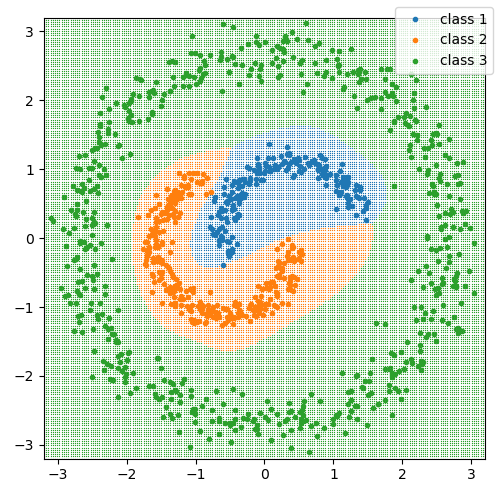

In [4]:
cc = plt.rcParams['axes.prop_cycle'].by_key()['color']

x_axis = np.linspace(-3.2, 3.2, num=200)
y_axis = np.linspace(-3.2, 3.2, num=200)

x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)

X_input_coords = np.vstack((x_mesh.flatten(), y_mesh.flatten())).T

model_pred = model.predict(X_input_coords)
model_index = np.argmax(model_pred, axis=1)

X_pred_class1 = X_input_coords[model_index==0]
X_pred_class2 = X_input_coords[model_index==1]
X_pred_class3 = X_input_coords[model_index==2]

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.set_aspect('equal')
ax.plot(X_pred_class1[:,0], X_pred_class1[:,1], marker='x', markersize=.3, linewidth=0, c=cc[0])
ax.plot(X_pred_class2[:,0], X_pred_class2[:,1], marker='x', markersize=.3, linewidth=0, c=cc[1])
ax.plot(X_pred_class3[:,0], X_pred_class3[:,1], marker='x', markersize=.3, linewidth=0, c=cc[2])
ax.plot(x_class1[:,0], x_class1[:,1], marker='.', linewidth=0, c=cc[0], label='class 1')
ax.plot(x_class2[:,0], x_class2[:,1], marker='.', linewidth=0, c=cc[1], label='class 2')
ax.plot(x_class3[:,0], x_class3[:,1], marker='.', linewidth=0, c=cc[2], label='class 3')
ax.set_xlim((-3.2, 3.2))
ax.set_ylim((-3.2, 3.2))
fig.legend()
fig.tight_layout()

**Challenge Problem**

The plot above ignores the model's confidence in its predictions. For each class, identify the 10 points which the model predicts the correct class with the least confidence. Indicate them on a plot.